# ВВЕДЕНИЕ В ООП

Объектно-ориентированное программирование (ООП) — это парадигма программирования, основанная на концепции "объектов", которые являются основными строительными блоками программы. Каждый объект представляет собой экземпляр класса и объединяет данные (состояние) и методы (поведение), которые могут быть применены к этим данным.

Класс — это шаблон или "чертеж", который определяет свойства (переменные) и методы (функции), характерные для объекта.
Объект — это конкретный экземпляр класса. Один класс может порождать множество объектов.

**Основные приниципы ООП:**

- Инкапсуляция:
Инкапсуляция предполагает объединение данных и методов, которые работают с этими данными, в одном объекте. Это позволяет скрыть внутреннее устройство объекта и защитить данные от несанкционированного доступа.

- Наследование:
Наследование позволяет одному классу (производному или дочернему) унаследовать свойства и методы другого класса (базового или родительского). Это способствует повторному использованию кода и созданию более сложных структур на основе уже существующих.

- Полиморфизм:
Полиморфизм позволяет использовать один и тот же метод или операцию для разных типов объектов. Это достигается за счет перегрузки методов или переопределения методов в производных классах.

- Абстракция:
Абстракция предполагает выделение основных характеристик объекта, скрывая детали его реализации. Это позволяет сосредоточиться на существенных аспектах задачи, не отвлекаясь на неважные подробности.

*ООП широко применяется в разработке сложных программных систем, поскольку способствует структурированию кода, улучшает его читаемость и облегчает поддержку и расширение программ*

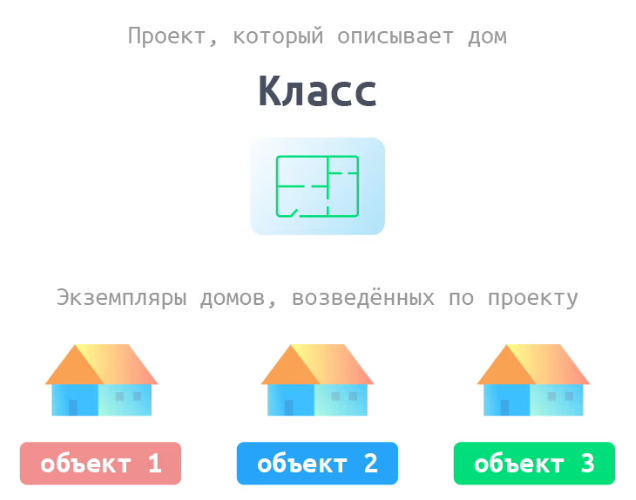

## Атрибуты классов и объектов

Для получения списка всех атрибутов и методов объекта можно воспользоваться встроенной функцией dir()

Все атрибуты, которыми мы наделяем созданные объекты, хранятся в специальном словаре, который доступен в качестве атрибута __dict__

In [3]:
# пустой класс с заглушкой
class Student:   
    pass

In [4]:
Student.age = 21  # добавление атрибута класса

In [10]:
alex = Student

In [14]:
alex.__dict__

mappingproxy({'__module__': '__main__',
              '__dict__': <attribute '__dict__' of 'Student' objects>,
              '__weakref__': <attribute '__weakref__' of 'Student' objects>,
              '__doc__': None,
              'age': 21})

In [23]:
bob =  Student
bob.score = 4   # создание атрибута объекта

In [22]:
bob.__dict__

mappingproxy({'__module__': '__main__',
              '__dict__': <attribute '__dict__' of 'Student' objects>,
              '__weakref__': <attribute '__weakref__' of 'Student' objects>,
              '__doc__': None,
              'age': 21,
              'score': 4})

In [24]:
# создание класса с атрибутами
class Player:
    health = 100
    damage = 10

In [29]:
# создание экземпляра класса (объекта) с атрибутами класса по умолчанию
zombie = Player()

In [31]:
# добавление атрибута объекта
zombie.skin = 'green_zombie'

In [52]:
zombie.__dict__  # будут показаны только собственные атрибуты объекта

{'skin': 'green_zombie'}

**Функции, работающие с атрибутами**

getattr(object, name[, default])

возвращает значение атрибута name объекта obj. Если объект obj не имеет атрибута name, возвращается значение по умолчанию default. Если значение по умолчанию не указано, возбуждается исключение AttributeError.

In [33]:
getattr(zombie,'skin')

'green_zombie'

In [37]:
getattr(Player,'skin','ошибка, такого нет!')

'ошибка, такого нет!'

In [36]:
getattr(Player, 'damage')

10

setattr(obj, name, value)

устанавливает объекту obj атрибут name со значением value. Если объект obj уже имеет атрибут name, его значение перезаписывается.

In [40]:
setattr(Player, 'speed',10)

In [41]:
Player.__dict__

mappingproxy({'__module__': '__main__',
              'health': 100,
              'damage': 10,
              '__dict__': <attribute '__dict__' of 'Player' objects>,
              '__weakref__': <attribute '__weakref__' of 'Player' objects>,
              '__doc__': None,
              'speed': 10})

In [43]:
zombie.speed

10

delattr(obj, name) 

удаляет атрибут name у объекта obj. Если объект не имеет атрибута name, возбуждается исключение AttributeError.

нельзя удалить атрибут класса, через экземпляр класса.

In [44]:
delattr(Player, 'speed')

In [46]:
# zombie.speed
# ошибка

hasattr(obj,name) 

возвращает True, если объект obj имеет атрибут name, или False в противном случае.

In [48]:
hasattr(Player, 'damage')

True

## Методы экземпляра класса

 Метод экземпляра — это функция, которая определена внутри класса, принадлежит объекту этого класса и имеет доступ к атрибутам объекта.

In [68]:
# создание класса с атрибутами и методами
class Player:
    health = 100
    damage = 10
    
    def hit(self, damage=damage):
        print(f'Игрок наносит {damage} единиц урона!')
    
    def loss(self,count):
        print(f'Игрок теряет {count} единиц здоровья!')
        self.health -= count
        print(f'Здоровья осталось: {self.health}')

Параметр self необходимо указывать в каждом методе экземпляра. Когда метод вызывается, параметр self в качестве аргумента принимает тот экземпляр, через который этот метод был вызван.

In [77]:
player1 = Player()
player1.hit()

Игрок наносит 10 единиц урона!


In [78]:
player1.loss(50)
player1.loss(11)

Игрок теряет 50 единиц здоровья!
Здоровья осталось: 50
Игрок теряет 11 единиц здоровья!
Здоровья осталось: 39


## Метод __init__

Если нам требуется, чтобы объект обладал атрибутами, нам приходится определять их вручную для каждого объекта, либо определять атрибуты на уровне класса. Очевидно, оба способа имеют свои недостатки, так как в первом случае нам приходится определять каждый атрибут для каждого объекта, во втором случае — все экземпляры класса имеют атрибуты с одними и теми же значениями, что не всегда нужно. Решить данную проблему позволяет специальный метод __ init __ ().

Метод __init__() инициализирует атрибуты объекта. Сразу после создания объекта исполняется метод __init__(), и параметру self автоматически присваивается объект, который был только что создан, что позволяет тут же наделить его необходимыми атрибутами.

In [95]:
# создание класса с атрибутами и методами
class Player:

    def __init__(self, health=100, damage=10):
        self.health = health
        self.damage = damage
        self.inventory = []

    def hit(self, damage):
        print(f'Игрок наносит {damage} единиц урона!')

    def loss(self, count):
        print(f'Игрок теряет {count} единиц здоровья!')
        self.health -= count
        print(f'Здоровья осталось: {self.health}')

    def info(self):
        print(self.__dict__)

In [96]:
player1 = Player(200,25)

In [97]:
player1.info()

{'health': 200, 'damage': 25, 'inventory': []}


Применение метода к объекту преобразуется в вызов функции, путем обращения к ней через соответствующий класс и передачи ей в качестве аргумента объекта, который этот метод вызвал.

In [98]:
str.title('hello')

'Hello'

In [99]:
'hello'.title()  # аналогично

'Hello'